In [1]:
#import libraries
import pandas as pd
import cbsodata as cbs
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [24]:
#load data
#data_license = pd.DataFrame(cbs.get_data('83488ENG'))
data_traffic_original = pd.DataFrame(cbs.get_data('84707ENG'))
#data_travel = pd.DataFrame(cbs.get_data('84713ENG'))

To be able to answer our main research question, we this first want to find out if there is actally a difference in people's use of public transport based on whether they have a driving license or not. Our hypothesis is that people with a driving license will make less use of public transport than people who do not have a driving license.

In [25]:
#filtering dataset

data_traffic_original.set_index('ID', inplace=True)
data_traffic = data_traffic_original.rename({'UseOfPublicTransport_2': 'Daily public transport use %'}, axis = 1)
data_traffic = data_traffic.rename({'TrafficParticipation_1': 'Daily traffic participation %'}, axis = 1)
data_traffic = data_traffic.rename({'Periods': 'Year'}, axis = 1)
data_traffic = data_traffic.drop(columns=['Population', 'Margins'])
data_traffic = data_traffic[(data_traffic.Sex == 'Total male and female')]
data_traffic = data_traffic.astype({'Daily traffic participation %' : float, 'Daily public transport use %' : float})

In [4]:
#filter data based on whether people have a driving license or not

Personal_Characteristics = ["Driver's license, pass. car, in own name",
       "Driver's license, passenger car in hh",
       "Driver's license, no passenger car in hh",
       "No driver's license; 17 years or older",] 
     
data_traffic_licence = data_traffic[data_traffic['PersonalCharacteristics'].isin(Personal_Characteristics)]

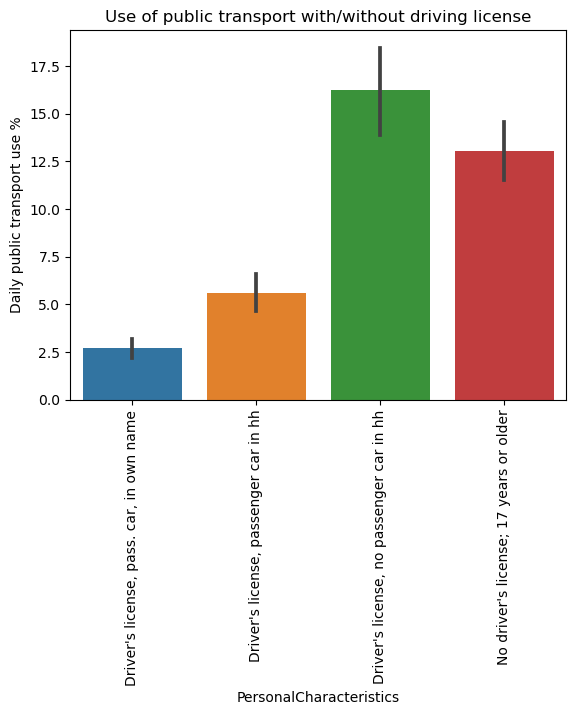

In [31]:
#create plot to show difference in use of public transport with or without driving license

sns.barplot(x='PersonalCharacteristics', y='Daily public transport use %', data=data_traffic_licence)
plt.title('Use of public transport with/without driving license')
plt.xticks(rotation=90)
plt.show()

As can be seen from the plot above, people with a driving license but without access to a car actually make more use of public transport than people who do not have a driving license. To check whether or not this unexpected outcome is caused by the data from the covid years (2020-2021), another plot is created where each year is showed separated.

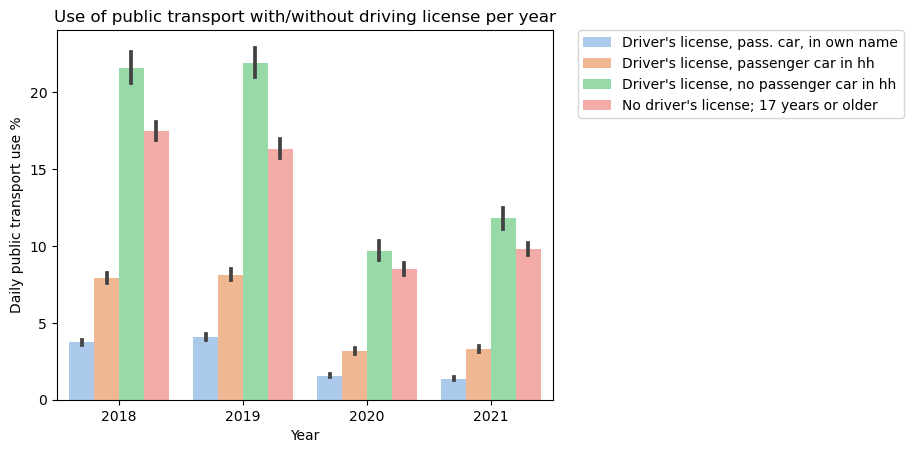

In [32]:
#create plot per year to see if covid years (2020-2021) are causing irregularities

sns_plot = sns.barplot(x='Year', y='Daily public transport use %', data=data_traffic_licence, hue ='PersonalCharacteristics', palette="pastel")
plt.title('Use of public transport with/without driving license per year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

The plot shows that the distribution of data in the covid years does not differ much from 2018 and 2019. This means that our hypothesis is not completely true. People without a driving license do not per se make more use of public transport than people with a driving license.

In order to be able to explain this we will take a look into the personal characteristics of people who make the least use of public transport.

In [38]:
data_traffic_filter = data_traffic[(data_traffic.Sex == 'Total male and female')]     #do not make a difference between male/female but only look at total population

#remove not needed personal characteristic groups
options = ['Total persons', 'Age: 6 to 11 years', 'Age: 12 to 17 years',
       "Driver's license, pass. car, in own name",
       "Driver's license, passenger car in hh",
       "Driver's license, no passenger car in hh",
       "No driver's license; 17 years or older",
       "No driver's license; under 17",
       'level of educ: 1. Low'] 
    
data_traffic_filter = data_traffic_filter[~data_traffic_filter['PersonalCharacteristics'].isin(options)]
data_traffic_filter = data_traffic_filter.drop_duplicates()
data_traffic_filter = data_traffic_filter.drop_duplicates(subset=['PersonalCharacteristics', 'Year'])
data_traffic_filter = data_traffic_filter.sort_values('Daily public transport use %', ascending=True)

#separate data per year, only use available non-covid years
data_traffic_2018 = data_traffic_filter[(data_traffic_filter.Year == '2018')]
data_traffic_2019 = data_traffic_filter[(data_traffic_filter.Year == '2019')]


In [41]:
#create plot to show groups with lowest daily public transport usage

fig1 = px.bar(data_traffic_2018, x='Daily public transport use %', y='PersonalCharacteristics', color = 'Daily public transport use %', range_color=[0,8], title='Groups with lowest daily public transport usage 2018')
fig1.update_yaxes(categoryorder='total ascending', range= [0.5,6.5])
fig1.update_xaxes(range= [0,8])
fig1.show()

fig2 = px.bar(data_traffic_2019, x='Daily public transport use %', y='PersonalCharacteristics', color = 'Daily public transport use %', range_color=[0,8], title='Groups with lowest daily public transport usage 2019')
fig2.update_yaxes(categoryorder='total ascending', range= [0.5,6.5])
fig2.update_xaxes(range= [0,8])
fig2.show()


As can be seen from the plot, retired and elderly make very little use of public transport. The other groups that show up are disabeled, unemployed and low-educated people. If these groups whith a low daily use of public transport also seem to have a low rate of driving license holders, this could explain the previous plots.
To check this we will first look into the driving license holders per age group.